# 01 - Data Exploration

**Goal:** Explore the raw GSE120575 melanoma scRNA-seq data before building the full analysis pipeline.

This notebook covers:
1. Loading both raw data files
2. Examining shapes, column names, and sample values
3. Checking for missing values
4. Visualizing distributions of genes per cell and cells per gene
5. Listing unique patient IDs and their metadata
6. Saving exploratory plots to `results/figures/`

---

**Dataset:** GSE120575 (Sade-Feldman et al., 2018)  
**Source:** Tumor-infiltrating CD45+ immune cells from melanoma patients  
**Files:**
- `GSE120575_Sade_Feldman_melanoma_single_cells_TPM_GEO.txt.gz` - Expression matrix
- `GSE120575_patient_ID_single_cells.txt.gz` - Cell metadata


## Setup


In [1]:
# Standard imports
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Add src directory to path for importing our modules
PROJECT_ROOT = Path.cwd().parent
sys.path.insert(0, str(PROJECT_ROOT / "src"))

# Import our data loading functions
from data_loading import (
    load_expression_matrix,
    load_patient_mapping,
    build_anndata,
    DEFAULT_EXPR_PATH,
    DEFAULT_PATIENT_PATH,
)

# Set up paths
EXPR_PATH = PROJECT_ROOT / DEFAULT_EXPR_PATH
PATIENT_PATH = PROJECT_ROOT / DEFAULT_PATIENT_PATH
FIGURES_DIR = PROJECT_ROOT / "results" / "figures"

# Ensure figures directory exists
FIGURES_DIR.mkdir(parents=True, exist_ok=True)

# Configure plotting
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['font.size'] = 11

print(f"Project root: {PROJECT_ROOT}")
print(f"Expression file: {EXPR_PATH}")
print(f"Patient file: {PATIENT_PATH}")
print(f"Figures will be saved to: {FIGURES_DIR}")


Project root: /Users/tarekalakkadp/Desktop/uvic/fourth-year/fall/csc427/final-project/scRNA-immunotherapy-response-ml
Expression file: /Users/tarekalakkadp/Desktop/uvic/fourth-year/fall/csc427/final-project/scRNA-immunotherapy-response-ml/data/raw/GSE120575_Sade_Feldman_melanoma_single_cells_TPM_GEO.txt.gz
Patient file: /Users/tarekalakkadp/Desktop/uvic/fourth-year/fall/csc427/final-project/scRNA-immunotherapy-response-ml/data/raw/GSE120575_patient_ID_single_cells.txt.gz
Figures will be saved to: /Users/tarekalakkadp/Desktop/uvic/fourth-year/fall/csc427/final-project/scRNA-immunotherapy-response-ml/results/figures


---
## 1. Load and Explore Expression Matrix

The expression file contains **log2(TPM+1)** values for ~55k genes across ~16k cells.


In [2]:
# Load expression matrix
print("Loading expression matrix (this may take a minute)...")
expr_df = load_expression_matrix(EXPR_PATH)


Loading expression matrix (this may take a minute)...
  Dropping 1 unnamed columns: ['Unnamed: 0']
  Dropping 1 cells with all-NaN values: ['H9_P5_M67_L001_T_enriched']
Loaded expression matrix: 55737 genes x 16290 cells


In [3]:
# Basic shape and structure
print("Expression Matrix Shape")
print("=" * 40)
print(f"Rows (genes): {expr_df.shape[0]:,}")
print(f"Columns (cells): {expr_df.shape[1]:,}")
print(f"Total values: {expr_df.size:,}")
print(f"Memory usage: {expr_df.memory_usage(deep=True).sum() / 1e9:.2f} GB")


Expression Matrix Shape
Rows (genes): 55,737
Columns (cells): 16,290
Total values: 907,955,730
Memory usage: 7.27 GB


In [4]:
# Sample gene names (first 20 and last 10)
print("Sample Gene Names (Index)")
print("=" * 40)
print("\nFirst 20 genes:")
print(list(expr_df.index[:20]))
print("\nLast 10 genes:")
print(list(expr_df.index[-10:]))


Sample Gene Names (Index)

First 20 genes:
['TSPAN6', 'TNMD', 'DPM1', 'SCYL3', 'C1orf112', 'FGR', 'CFH', 'FUCA2', 'GCLC', 'NFYA', 'STPG1', 'NIPAL3', 'LAS1L', 'ENPP4', 'SEMA3F', 'CFTR', 'ANKIB1', 'CYP51A1', 'KRIT1', 'RAD52']

Last 10 genes:
['RP11-126K1.9', 'RP4-671G15.2', 'OR6R2P', 'RP11-225H22.7', 'RP11-731C17.2', 'RP4-621B10.8', 'RP11-114I8.4', 'RP11-180C16.1', 'AP000230.1', 'RP11-80H18.4']


In [5]:
# Sample cell barcodes (column names)
print("Sample Cell Barcodes (Columns)")
print("=" * 40)
print("\nFirst 10 cells:")
print(list(expr_df.columns[:10]))
print("\nLast 10 cells:")
print(list(expr_df.columns[-10:]))


Sample Cell Barcodes (Columns)

First 10 cells:
['A10_P3_M11', 'A11_P1_M11', 'A11_P3_M11', 'A11_P4_M11', 'A12_P3_M11', 'A12_P6_M11', 'A2_P1_M11', 'A2_P4_M11', 'A3_P1_M11', 'A3_P3_M11']

Last 10 cells:
['H11_P5_M67_L001_T_enriched', 'H12_P5_M67_L001_T_enriched', 'H1_P5_M67_L001_T_enriched', 'H2_P5_M67_L001_T_enriched', 'H3_P5_M67_L001_T_enriched', 'H4_P5_M67_L001_T_enriched', 'H5_P5_M67_L001_T_enriched', 'H6_P5_M67_L001_T_enriched', 'H7_P5_M67_L001_T_enriched', 'H8_P5_M67_L001_T_enriched']


In [6]:
# Sample expression values (top-left corner)
print("Sample Expression Values")
print("=" * 40)
print("\nTop-left corner of matrix (5 genes × 5 cells):")
display(expr_df.iloc[:5, :5])


Sample Expression Values

Top-left corner of matrix (5 genes × 5 cells):


,A10_P3_M11,A11_P1_M11,A11_P3_M11,A11_P4_M11,A12_P3_M11
TSPAN6,0.00,0.0,0.00,0.0,0.0
TNMD,0.00,0.0,0.00,0.0,0.0
DPM1,9.24,0.0,7.99,0.0,0.0
SCYL3,0.00,0.0,0.00,0.0,0.0
C1orf112,0.00,0.0,0.00,0.0,0.0


In [7]:
# Expression value statistics
print("Expression Value Statistics")
print("=" * 40)
# Flatten to 1D for overall statistics
all_values = expr_df.values.flatten()
print(f"Min: {np.nanmin(all_values):.4f}")
print(f"Max: {np.nanmax(all_values):.4f}")
print(f"Mean: {np.nanmean(all_values):.4f}")
print(f"Median: {np.nanmedian(all_values):.4f}")
print(f"Std: {np.nanstd(all_values):.4f}")
print(f"\nNote: Data is log2(TPM+1) transformed, so 0 = not detected")


Expression Value Statistics
Min: 0.0000
Max: 19.4200
Mean: 0.2750
Median: 0.0000
Std: 1.4230

Note: Data is log2(TPM+1) transformed, so 0 = not detected


---
## 2. Load and Explore Patient Mapping

The patient mapping file contains metadata about each cell, including:
- Cell barcode
- Patient ID (Pre_P1, Post_P2, etc.)
- Response status (Responder / Non-responder)
- Therapy type (anti-PD1, anti-CTLA4, etc.)


In [8]:
# Load patient mapping
print("Loading patient mapping...")
patient_df = load_patient_mapping(PATIENT_PATH)


Loading patient mapping...
Loaded patient mapping: 16291 cells
  Unique patients: 48
  Response distribution: {'Non-responder': 10727, 'Responder': 5564}


In [9]:
# Patient mapping structure
print("Patient Mapping Structure")
print("=" * 40)
print(f"Number of cells: {len(patient_df):,}")
print(f"Columns: {list(patient_df.columns)}")
print(f"\nData types:")
print(patient_df.dtypes)


Patient Mapping Structure
Number of cells: 16,291
Columns: ['patient_id', 'response', 'therapy']

Data types:
patient_id    object
response      object
therapy       object
dtype: object


In [10]:
# Sample patient metadata
print("Sample Patient Metadata (first 10 rows)")
print("=" * 40)
patient_df.head(10)


Sample Patient Metadata (first 10 rows)


,patient_id,response,therapy
cell_id,,,
A10_P3_M11,Pre_P1,Responder,anti-CTLA4
A11_P1_M11,Pre_P1,Responder,anti-CTLA4
A11_P3_M11,Pre_P1,Responder,anti-CTLA4
A11_P4_M11,Pre_P1,Responder,anti-CTLA4
A12_P3_M11,Pre_P1,Responder,anti-CTLA4
A12_P6_M11,Pre_P1,Responder,anti-CTLA4
A2_P1_M11,Pre_P1,Responder,anti-CTLA4
A2_P4_M11,Pre_P1,Responder,anti-CTLA4
A3_P1_M11,Pre_P1,Responder,anti-CTLA4


In [11]:
# Unique values per column
print("Unique Values per Column")
print("=" * 40)
for col in patient_df.columns:
    unique_vals = patient_df[col].nunique()
    print(f"\n{col}: {unique_vals} unique values")
    if unique_vals <= 10:
        print(f"  Values: {list(patient_df[col].unique())}")


Unique Values per Column

patient_id: 48 unique values

response: 2 unique values
  Values: ['Responder', 'Non-responder']

therapy: 3 unique values
  Values: ['anti-CTLA4', 'anti-PD1', 'anti-CTLA4+PD1']


In [12]:
# Response distribution
print("Response Distribution (Cell Level)")
print("=" * 40)
response_counts = patient_df['response'].value_counts()
print(response_counts)
print(f"\nTotal cells: {response_counts.sum():,}")


Response Distribution (Cell Level)
response
Non-responder    10727
Responder         5564
Name: count, dtype: int64

Total cells: 16,291


In [13]:
# Therapy distribution
print("Therapy Type Distribution")
print("=" * 40)
therapy_counts = patient_df['therapy'].value_counts()
print(therapy_counts)


Therapy Type Distribution
therapy
anti-PD1          11653
anti-CTLA4+PD1     4121
anti-CTLA4          517
Name: count, dtype: int64


---
## 3. Check for Missing Values

Identify any data quality issues before analysis.


In [14]:
# Missing values in expression matrix
print("Missing Values in Expression Matrix")
print("=" * 40)

nan_per_gene = expr_df.isna().sum(axis=1)
nan_per_cell = expr_df.isna().sum(axis=0)

print(f"Total NaN values: {expr_df.isna().sum().sum():,}")
print(f"Genes with any NaN: {(nan_per_gene > 0).sum():,}")
print(f"Cells with any NaN: {(nan_per_cell > 0).sum():,}")

# Show cells/genes with most NaNs if any exist
if nan_per_gene.max() > 0:
    print(f"\nGenes with most NaN values:")
    top_nan_genes = nan_per_gene.nlargest(5)
    for gene, count in top_nan_genes.items():
        print(f"  {gene}: {count:,} NaN values")

if nan_per_cell.max() > 0:
    print(f"\nCells with most NaN values:")
    top_nan_cells = nan_per_cell.nlargest(5)
    for cell, count in top_nan_cells.items():
        print(f"  {cell}: {count:,} NaN values")


Missing Values in Expression Matrix
Total NaN values: 0
Genes with any NaN: 0
Cells with any NaN: 0


In [15]:
# Missing values in patient mapping
print("Missing Values in Patient Mapping")
print("=" * 40)

for col in patient_df.columns:
    nan_count = patient_df[col].isna().sum()
    print(f"{col}: {nan_count:,} missing values ({nan_count/len(patient_df)*100:.2f}%)")


Missing Values in Patient Mapping
patient_id: 0 missing values (0.00%)
response: 0 missing values (0.00%)
therapy: 0 missing values (0.00%)


In [16]:
# Check cell barcode alignment between files
print("Cell Barcode Alignment Check")
print("=" * 40)

expr_cells = set(expr_df.columns)
patient_cells = set(patient_df.index)

common_cells = expr_cells & patient_cells
expr_only = expr_cells - patient_cells
patient_only = patient_cells - expr_cells

print(f"Cells in expression matrix: {len(expr_cells):,}")
print(f"Cells in patient mapping: {len(patient_cells):,}")
print(f"Cells in both (aligned): {len(common_cells):,}")
print(f"Cells only in expression: {len(expr_only):,}")
print(f"Cells only in patient mapping: {len(patient_only):,}")

if expr_only:
    print(f"\nSample cells only in expression: {list(expr_only)[:5]}")
if patient_only:
    print(f"\nSample cells only in patient mapping: {list(patient_only)[:5]}")


Cell Barcode Alignment Check
Cells in expression matrix: 16,290
Cells in patient mapping: 16,291
Cells in both (aligned): 16,290
Cells only in expression: 0
Cells only in patient mapping: 1

Sample cells only in patient mapping: ['H9_P5_M67_L001_T_enriched']


---
## 4. Visualize Distributions

Visualize key quality metrics:
- Genes detected per cell (cell complexity)
- Cells where each gene is expressed (gene prevalence)


In [17]:
# Calculate genes per cell and cells per gene
# A gene is "detected" in a cell if expression > 0 (log2(TPM+1) > 0 means TPM > 0)
detected = expr_df.values > 0

genes_per_cell = detected.sum(axis=0)  # Sum rows for each column (cell)
cells_per_gene = detected.sum(axis=1)  # Sum columns for each row (gene)

print("Genes per Cell Statistics")
print("=" * 40)
print(f"Min: {genes_per_cell.min():,}")
print(f"Max: {genes_per_cell.max():,}")
print(f"Mean: {genes_per_cell.mean():,.1f}")
print(f"Median: {np.median(genes_per_cell):,.0f}")
print(f"Std: {genes_per_cell.std():,.1f}")

print("\nCells per Gene Statistics")
print("=" * 40)
print(f"Min: {cells_per_gene.min():,}")
print(f"Max: {cells_per_gene.max():,}")
print(f"Mean: {cells_per_gene.mean():,.1f}")
print(f"Median: {np.median(cells_per_gene):,.0f}")
print(f"Std: {cells_per_gene.std():,.1f}")


Genes per Cell Statistics
Min: 1,093
Max: 9,315
Mean: 2,408.6
Median: 2,151
Std: 946.5

Cells per Gene Statistics
Min: 0
Max: 16,290
Mean: 704.0
Median: 30
Std: 1,786.3


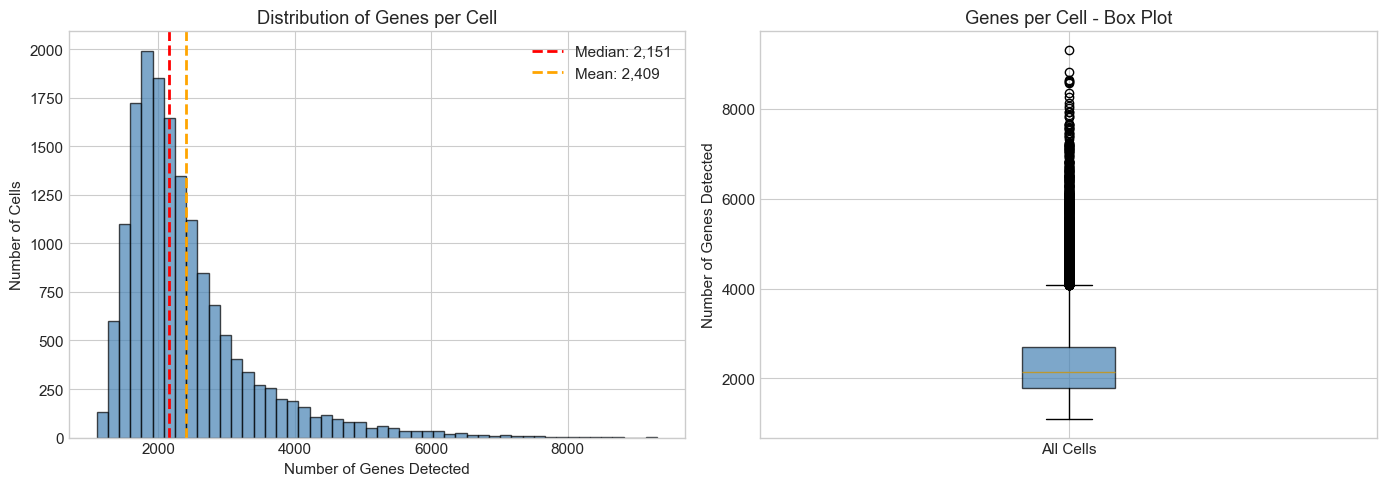

✓ Saved: /Users/tarekalakkadp/Desktop/uvic/fourth-year/fall/csc427/final-project/scRNA-immunotherapy-response-ml/results/figures/genes_per_cell_distribution.png


In [18]:
# Plot: Distribution of genes per cell
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
ax1 = axes[0]
ax1.hist(genes_per_cell, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
ax1.axvline(np.median(genes_per_cell), color='red', linestyle='--', linewidth=2, 
            label=f'Median: {np.median(genes_per_cell):,.0f}')
ax1.axvline(genes_per_cell.mean(), color='orange', linestyle='--', linewidth=2,
            label=f'Mean: {genes_per_cell.mean():,.0f}')
ax1.set_xlabel('Number of Genes Detected')
ax1.set_ylabel('Number of Cells')
ax1.set_title('Distribution of Genes per Cell')
ax1.legend()

# Box plot
ax2 = axes[1]
bp = ax2.boxplot(genes_per_cell, vert=True, patch_artist=True)
bp['boxes'][0].set_facecolor('steelblue')
bp['boxes'][0].set_alpha(0.7)
ax2.set_ylabel('Number of Genes Detected')
ax2.set_title('Genes per Cell - Box Plot')
ax2.set_xticklabels(['All Cells'])

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'genes_per_cell_distribution.png', bbox_inches='tight')
plt.show()
print(f"✓ Saved: {FIGURES_DIR / 'genes_per_cell_distribution.png'}")


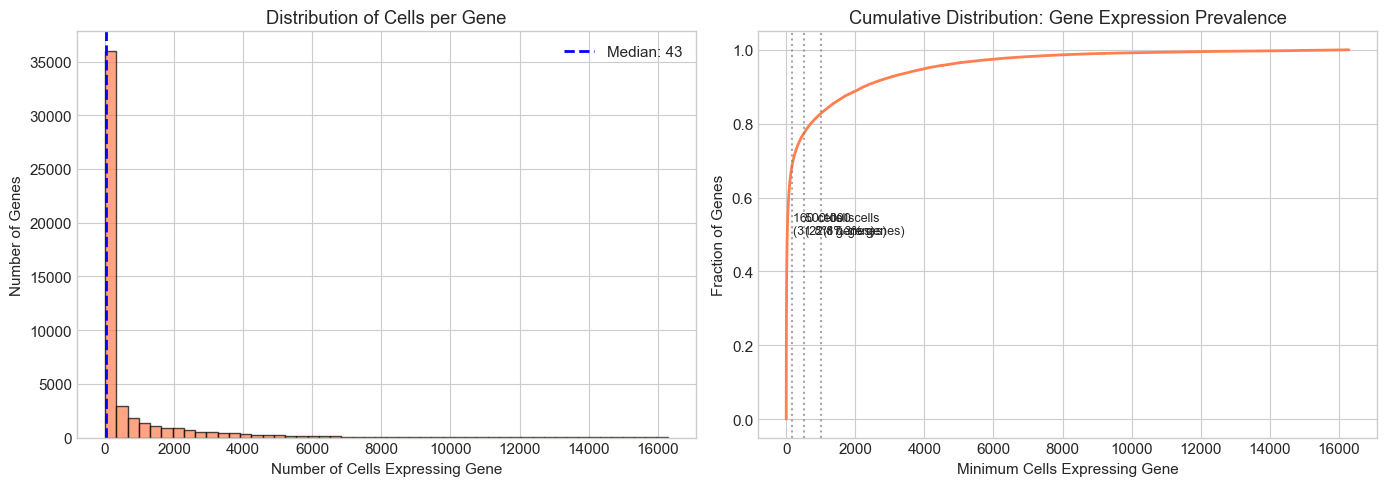

✓ Saved: /Users/tarekalakkadp/Desktop/uvic/fourth-year/fall/csc427/final-project/scRNA-immunotherapy-response-ml/results/figures/cells_per_gene_distribution.png


In [19]:
# Plot: Distribution of cells per gene
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram (log scale for x-axis due to heavy right skew)
ax1 = axes[0]
# Filter out genes with 0 cells for log scale
cells_per_gene_nonzero = cells_per_gene[cells_per_gene > 0]
ax1.hist(cells_per_gene_nonzero, bins=50, edgecolor='black', alpha=0.7, color='coral')
ax1.set_xlabel('Number of Cells Expressing Gene')
ax1.set_ylabel('Number of Genes')
ax1.set_title('Distribution of Cells per Gene')
ax1.axvline(np.median(cells_per_gene_nonzero), color='blue', linestyle='--', linewidth=2,
            label=f'Median: {np.median(cells_per_gene_nonzero):,.0f}')
ax1.legend()

# Cumulative distribution (for filtering threshold insights)
ax2 = axes[1]
sorted_cells = np.sort(cells_per_gene)
cumulative = np.arange(1, len(sorted_cells) + 1) / len(sorted_cells)
ax2.plot(sorted_cells, cumulative, color='coral', linewidth=2)
ax2.set_xlabel('Minimum Cells Expressing Gene')
ax2.set_ylabel('Fraction of Genes')
ax2.set_title('Cumulative Distribution: Gene Expression Prevalence')

# Add threshold lines
thresholds = [160, 500, 1000]  # 1% of 16k, 3%, 6% approx
for thresh in thresholds:
    frac = (cells_per_gene >= thresh).mean()
    ax2.axvline(thresh, color='gray', linestyle=':', alpha=0.7)
    ax2.text(thresh + 50, 0.5, f'{thresh} cells\n({frac*100:.1f}% genes)', fontsize=9)

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'cells_per_gene_distribution.png', bbox_inches='tight')
plt.show()
print(f"✓ Saved: {FIGURES_DIR / 'cells_per_gene_distribution.png'}")


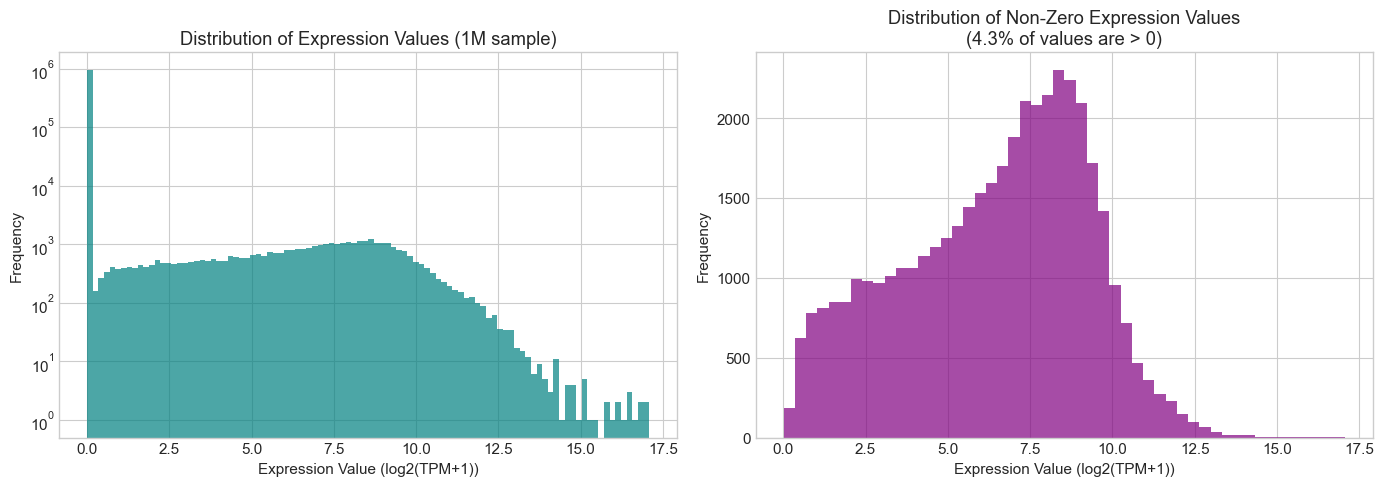

✓ Saved: /Users/tarekalakkadp/Desktop/uvic/fourth-year/fall/csc427/final-project/scRNA-immunotherapy-response-ml/results/figures/expression_value_distribution.png


In [20]:
# Plot: Expression value distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sample a subset of values for plotting (full matrix is too large)
np.random.seed(42)
sample_size = 1_000_000
flat_values = expr_df.values.flatten()
sample_values = np.random.choice(flat_values, size=min(sample_size, len(flat_values)), replace=False)

# Histogram of all values
ax1 = axes[0]
ax1.hist(sample_values, bins=100, edgecolor='none', alpha=0.7, color='teal')
ax1.set_xlabel('Expression Value (log2(TPM+1))')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Expression Values (1M sample)')
ax1.set_yscale('log')

# Histogram of non-zero values only
ax2 = axes[1]
nonzero_sample = sample_values[sample_values > 0]
ax2.hist(nonzero_sample, bins=50, edgecolor='none', alpha=0.7, color='purple')
ax2.set_xlabel('Expression Value (log2(TPM+1))')
ax2.set_ylabel('Frequency')
ax2.set_title(f'Distribution of Non-Zero Expression Values\n({len(nonzero_sample)/len(sample_values)*100:.1f}% of values are > 0)')

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'expression_value_distribution.png', bbox_inches='tight')
plt.show()
print(f"✓ Saved: {FIGURES_DIR / 'expression_value_distribution.png'}")


---
## 5. Patient ID Analysis

Explore patient-level metadata:
- Unique patient IDs and their format
- Cells per patient
- Response distribution at patient level
- Pre-treatment vs Post-treatment samples


In [21]:
# List all unique patient IDs
print("Unique Patient IDs")
print("=" * 40)
unique_patients = sorted(patient_df['patient_id'].unique())
print(f"Total unique patient IDs: {len(unique_patients)}")
print(f"\nAll patient IDs:")
for i, pid in enumerate(unique_patients):
    print(f"  {i+1:2d}. {pid}")


Unique Patient IDs
Total unique patient IDs: 48

All patient IDs:
   1. Post_P1
   2. Post_P10
   3. Post_P11
   4. Post_P12
   5. Post_P13
   6. Post_P14
   7. Post_P15
   8. Post_P16
   9. Post_P17
  10. Post_P18
  11. Post_P19
  12. Post_P1_2
  13. Post_P2
  14. Post_P20
  15. Post_P21
  16. Post_P22
  17. Post_P23
  18. Post_P23_2
  19. Post_P28
  20. Post_P28_2
  21. Post_P3
  22. Post_P30
  23. Post_P3_2
  24. Post_P4
  25. Post_P5
  26. Post_P5_2
  27. Post_P6
  28. Post_P7
  29. Post_P8
  30. Pre_P1
  31. Pre_P12
  32. Pre_P15
  33. Pre_P2
  34. Pre_P20
  35. Pre_P24
  36. Pre_P25
  37. Pre_P26
  38. Pre_P27
  39. Pre_P28
  40. Pre_P29
  41. Pre_P3
  42. Pre_P31
  43. Pre_P33
  44. Pre_P35
  45. Pre_P4
  46. Pre_P6
  47. Pre_P7
  48. Pre_P8


In [22]:
# Patient ID format analysis
print("Patient ID Format Analysis")
print("=" * 40)

# Parse Pre/Post and patient number
patient_df_copy = patient_df.copy()
patient_df_copy['timepoint'] = patient_df_copy['patient_id'].str.split('_').str[0]
patient_df_copy['patient_number'] = patient_df_copy['patient_id'].str.split('_').str[1]

print(f"\nTimepoint distribution:")
print(patient_df_copy['timepoint'].value_counts())

print(f"\nUnique base patient numbers: {patient_df_copy['patient_number'].nunique()}")
print("(Note: Some patients have both Pre and Post samples)")


Patient ID Format Analysis

Timepoint distribution:
timepoint
Post    10363
Pre      5928
Name: count, dtype: int64

Unique base patient numbers: 32
(Note: Some patients have both Pre and Post samples)


In [23]:
# Cells per patient
cells_per_patient = patient_df.groupby('patient_id').size().sort_values(ascending=False)

print("Cells per Patient")
print("=" * 40)
print(f"Min cells: {cells_per_patient.min():,}")
print(f"Max cells: {cells_per_patient.max():,}")
print(f"Mean cells: {cells_per_patient.mean():,.1f}")
print(f"Median cells: {cells_per_patient.median():,.0f}")

print(f"\nTop 10 patients by cell count:")
for pid, count in cells_per_patient.head(10).items():
    print(f"  {pid}: {count:,} cells")

print(f"\nBottom 5 patients by cell count:")
for pid, count in cells_per_patient.tail(5).items():
    print(f"  {pid}: {count:,} cells")


Cells per Patient
Min cells: 163
Max cells: 675
Mean cells: 339.4
Median cells: 338

Top 10 patients by cell count:
  Post_P4: 675 cells
  Post_P16: 463 cells
  Pre_P33: 452 cells
  Post_P13: 449 cells
  Post_P8: 409 cells
  Post_P19: 403 cells
  Post_P6: 400 cells
  Post_P10: 396 cells
  Post_P2: 380 cells
  Post_P28_2: 372 cells

Bottom 5 patients by cell count:
  Pre_P35: 238 cells
  Post_P7: 231 cells
  Pre_P1: 229 cells
  Post_P21: 213 cells
  Pre_P29: 163 cells


In [24]:
# Patient-level response summary
print("Patient-Level Response Summary")
print("=" * 40)

# Get unique patient-response mapping
patient_response = patient_df.groupby('patient_id')['response'].first()
response_counts = patient_response.value_counts()

print(f"Responders: {response_counts.get('Responder', 0)} patients")
print(f"Non-responders: {response_counts.get('Non-responder', 0)} patients")
print(f"Total: {len(patient_response)} patient samples")

# Compare to paper expectations
print(f"\nComparison to paper (expected ~17 R, ~31 NR):")
print(f"  Paper: 17 R, 31 NR = 48 total")
print(f"  Ours:  {response_counts.get('Responder', 0)} R, {response_counts.get('Non-responder', 0)} NR = {len(patient_response)} total")


Patient-Level Response Summary
Responders: 17 patients
Non-responders: 31 patients
Total: 48 patient samples

Comparison to paper (expected ~17 R, ~31 NR):
  Paper: 17 R, 31 NR = 48 total
  Ours:  17 R, 31 NR = 48 total


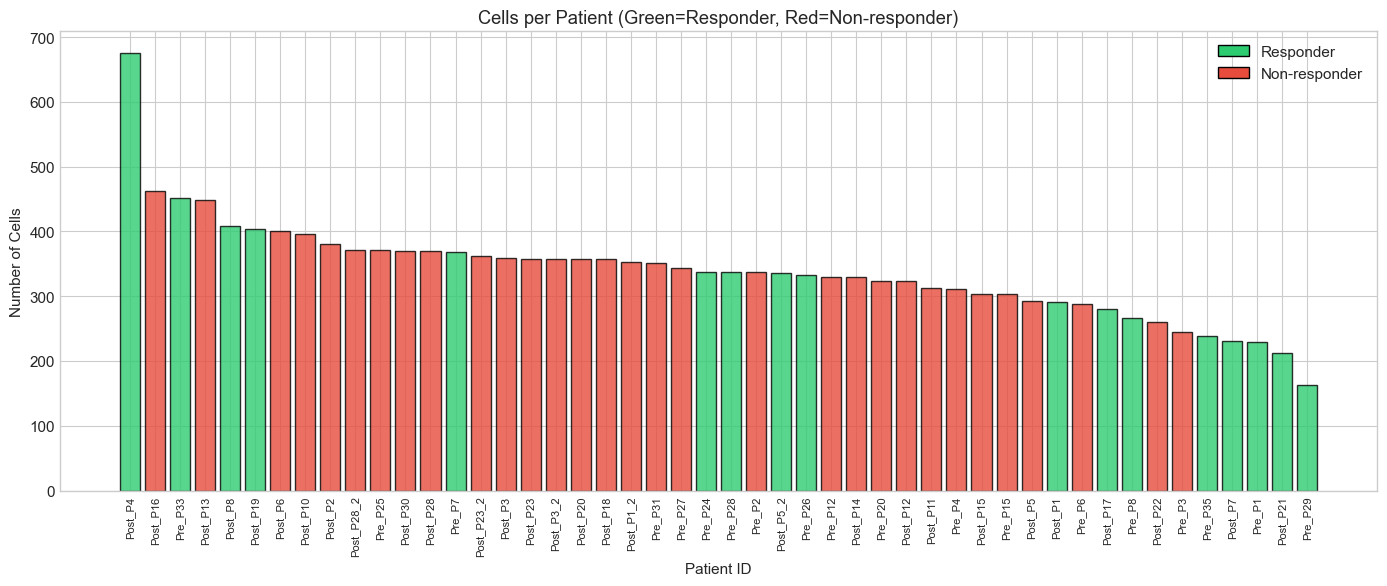

✓ Saved: /Users/tarekalakkadp/Desktop/uvic/fourth-year/fall/csc427/final-project/scRNA-immunotherapy-response-ml/results/figures/cells_per_patient.png


In [25]:
# Plot: Cells per patient colored by response
fig, ax = plt.subplots(figsize=(14, 6))

# Prepare data
patient_summary = patient_df.groupby('patient_id').agg({
    'response': 'first',
    'therapy': 'first'
}).reset_index()
patient_summary['n_cells'] = patient_summary['patient_id'].map(cells_per_patient)
patient_summary = patient_summary.sort_values('n_cells', ascending=False)

# Create bar plot
colors = ['#2ecc71' if r == 'Responder' else '#e74c3c' for r in patient_summary['response']]
bars = ax.bar(range(len(patient_summary)), patient_summary['n_cells'], color=colors, edgecolor='black', alpha=0.8)

ax.set_xlabel('Patient ID')
ax.set_ylabel('Number of Cells')
ax.set_title('Cells per Patient (Green=Responder, Red=Non-responder)')
ax.set_xticks(range(len(patient_summary)))
ax.set_xticklabels(patient_summary['patient_id'], rotation=90, fontsize=8)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#2ecc71', edgecolor='black', label='Responder'),
    Patch(facecolor='#e74c3c', edgecolor='black', label='Non-responder')
]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'cells_per_patient.png', bbox_inches='tight')
plt.show()
print(f"✓ Saved: {FIGURES_DIR / 'cells_per_patient.png'}")


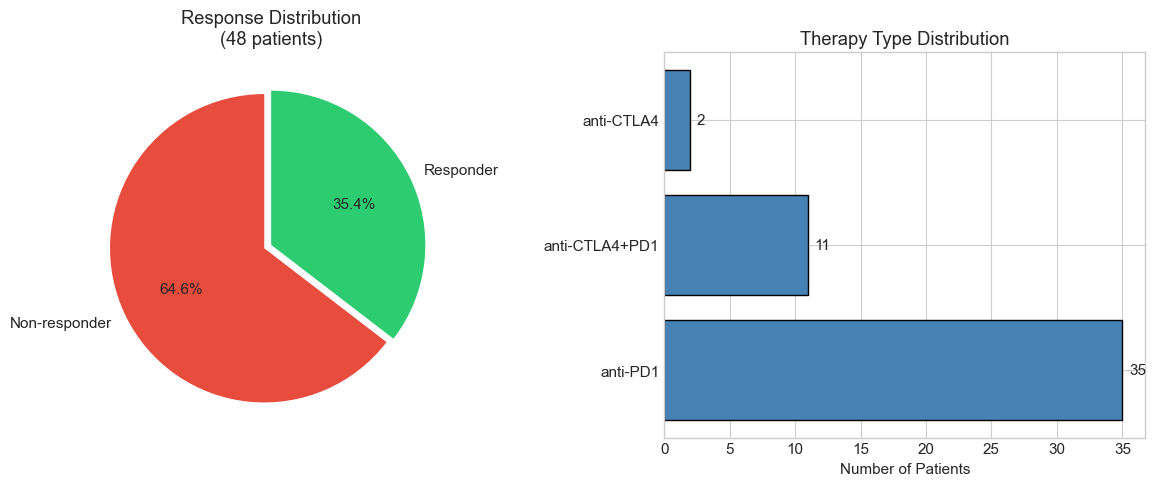

✓ Saved: /Users/tarekalakkadp/Desktop/uvic/fourth-year/fall/csc427/final-project/scRNA-immunotherapy-response-ml/results/figures/response_therapy_distribution.png


In [26]:
# Plot: Response and therapy distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Response distribution (patient level)
ax1 = axes[0]
response_colors = {'Responder': '#2ecc71', 'Non-responder': '#e74c3c'}
patient_response_counts = patient_response.value_counts()
ax1.pie(patient_response_counts, labels=patient_response_counts.index, autopct='%1.1f%%',
        colors=[response_colors[r] for r in patient_response_counts.index],
        explode=(0.05, 0), startangle=90)
ax1.set_title(f'Response Distribution\n({len(patient_response)} patients)')

# Therapy distribution (patient level)
ax2 = axes[1]
patient_therapy = patient_df.groupby('patient_id')['therapy'].first()
therapy_counts = patient_therapy.value_counts()
ax2.barh(range(len(therapy_counts)), therapy_counts.values, color='steelblue', edgecolor='black')
ax2.set_yticks(range(len(therapy_counts)))
ax2.set_yticklabels(therapy_counts.index)
ax2.set_xlabel('Number of Patients')
ax2.set_title('Therapy Type Distribution')

for i, v in enumerate(therapy_counts.values):
    ax2.text(v + 0.5, i, str(v), va='center')

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'response_therapy_distribution.png', bbox_inches='tight')
plt.show()
print(f"✓ Saved: {FIGURES_DIR / 'response_therapy_distribution.png'}")


---
## 6. Build and Explore Combined AnnData Object

Combine expression and patient data into an AnnData object for downstream analysis.


In [27]:
# Build AnnData object
print("Building AnnData object...")
adata = build_anndata(expr_df, patient_df)


Building AnnData object...

Built AnnData object:
  Shape: 16290 cells x 55737 genes
  Unique patients: 48
  Response distribution:
    Non-responder: 10726 cells
    Responder: 5564 cells


In [28]:
# AnnData structure summary
print("AnnData Structure Summary")
print("=" * 40)
print(f"\nShape: {adata.shape[0]:,} cells × {adata.shape[1]:,} genes")
print(f"\nObservation (cell) metadata columns:")
for col in adata.obs.columns:
    print(f"  - {col}")
print(f"\nVariable (gene) metadata columns:")
for col in adata.var.columns:
    print(f"  - {col}")
print(f"\nExpression matrix:")
print(f"  Type: {type(adata.X)}")
print(f"  Dtype: {adata.X.dtype}")
print(f"  Memory: {adata.X.nbytes / 1e9:.2f} GB")


AnnData Structure Summary

Shape: 16,290 cells × 55,737 genes

Observation (cell) metadata columns:
  - patient_id
  - response
  - therapy

Variable (gene) metadata columns:

Expression matrix:
  Type: <class 'numpy.ndarray'>
  Dtype: float32
  Memory: 3.63 GB


In [29]:
# Sample of adata.obs
print("Sample of adata.obs (cell metadata)")
print("=" * 40)
adata.obs.head(10)


Sample of adata.obs (cell metadata)


,patient_id,response,therapy
A10_P3_M11,Pre_P1,Responder,anti-CTLA4
A11_P1_M11,Pre_P1,Responder,anti-CTLA4
A11_P3_M11,Pre_P1,Responder,anti-CTLA4
A11_P4_M11,Pre_P1,Responder,anti-CTLA4
A12_P3_M11,Pre_P1,Responder,anti-CTLA4
A12_P6_M11,Pre_P1,Responder,anti-CTLA4
A2_P1_M11,Pre_P1,Responder,anti-CTLA4
A2_P4_M11,Pre_P1,Responder,anti-CTLA4
A3_P1_M11,Pre_P1,Responder,anti-CTLA4
A3_P3_M11,Pre_P1,Responder,anti-CTLA4


---
## 7. Check for 11-Gene Signature

The PRECISE paper identifies an **11-gene signature** predictive of ICI response:
`GAPDH, CD38, CCR7, HLA-DRB5, STAT1, GZMH, LGALS1, IFI6, EPSTI1, HLA-G, GBP5`

Let's verify these genes are present in our dataset.


In [30]:
# Define the 11-gene signature from the paper
SIGNATURE_GENES = [
    'GAPDH', 'CD38', 'CCR7', 'HLA-DRB5', 'STAT1',
    'GZMH', 'LGALS1', 'IFI6', 'EPSTI1', 'HLA-G', 'GBP5'
]

print("11-Gene Signature Presence Check")
print("=" * 40)

# Check which signature genes are present
gene_names = set(adata.var_names)
present_genes = []
missing_genes = []

for gene in SIGNATURE_GENES:
    if gene in gene_names:
        present_genes.append(gene)
        print(f"  ✓ {gene} - PRESENT")
    else:
        missing_genes.append(gene)
        print(f"  ✗ {gene} - MISSING")

print(f"\nSummary: {len(present_genes)}/{len(SIGNATURE_GENES)} signature genes present")

if missing_genes:
    print(f"\nMissing genes: {missing_genes}")
    print("\nSearching for similar gene names...")
    for missing in missing_genes:
        similar = [g for g in gene_names if missing.upper() in g.upper()]
        if similar:
            print(f"  {missing} → possible matches: {similar[:5]}")


11-Gene Signature Presence Check
  ✓ GAPDH - PRESENT
  ✓ CD38 - PRESENT
  ✓ CCR7 - PRESENT
  ✓ HLA-DRB5 - PRESENT
  ✓ STAT1 - PRESENT
  ✓ GZMH - PRESENT
  ✓ LGALS1 - PRESENT
  ✓ IFI6 - PRESENT
  ✓ EPSTI1 - PRESENT
  ✓ HLA-G - PRESENT
  ✓ GBP5 - PRESENT

Summary: 11/11 signature genes present


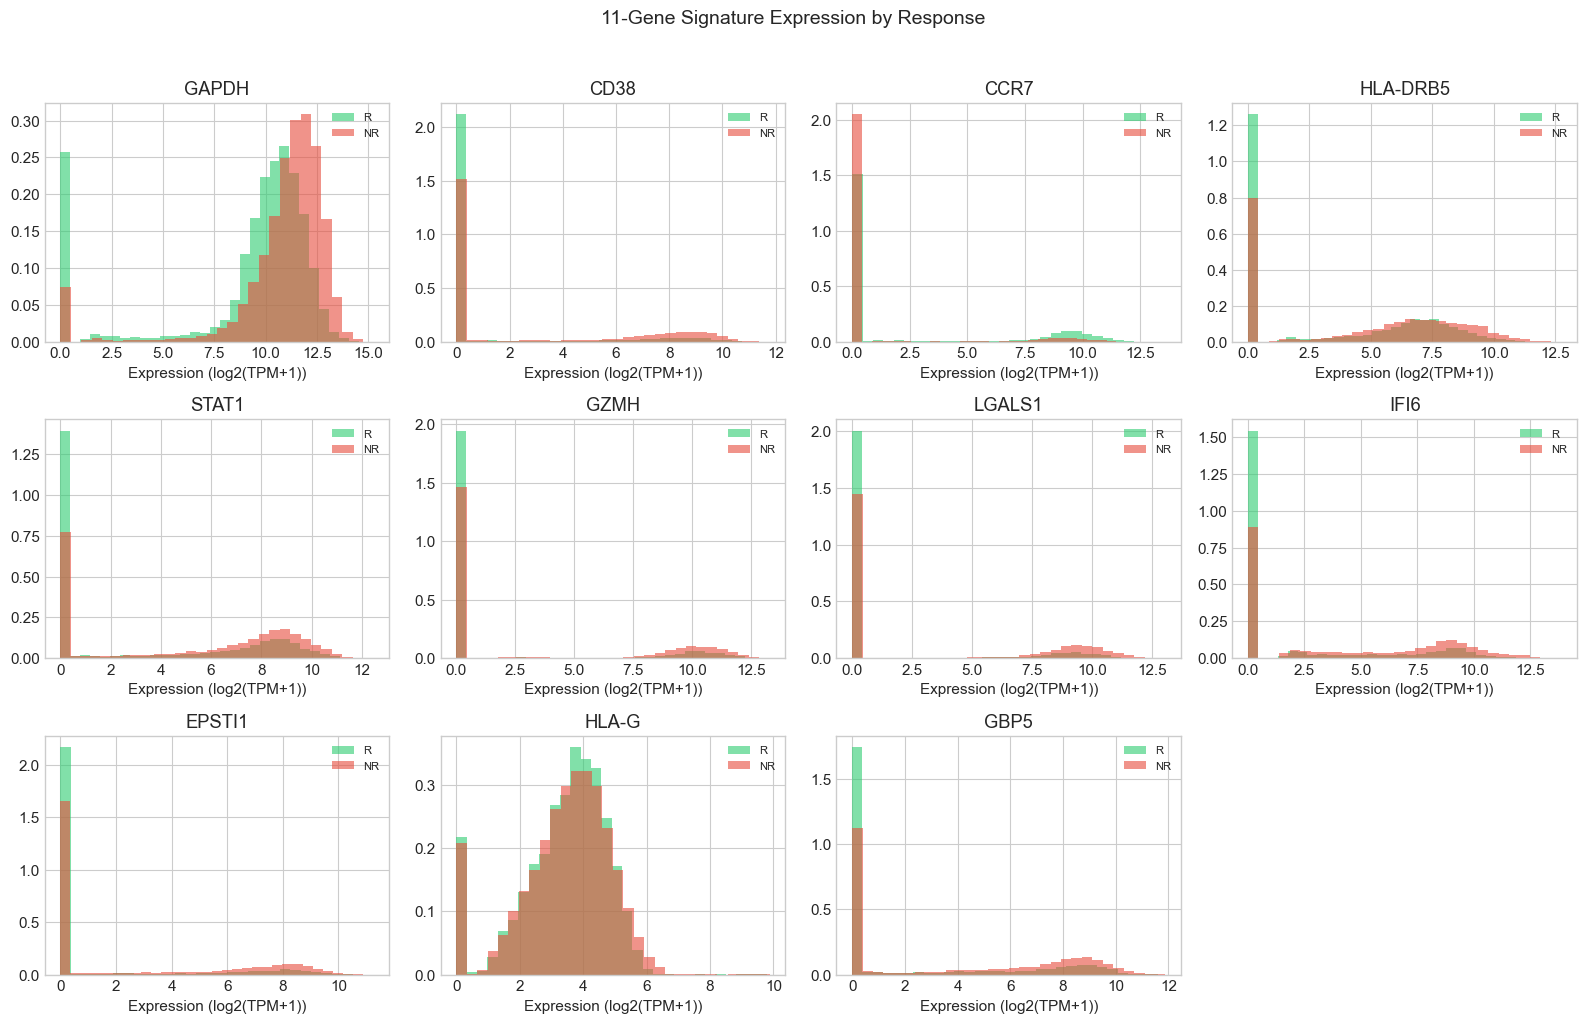

✓ Saved: /Users/tarekalakkadp/Desktop/uvic/fourth-year/fall/csc427/final-project/scRNA-immunotherapy-response-ml/results/figures/signature_genes_expression.png


In [31]:
# Plot expression of signature genes (for those present)
if present_genes:
    fig, axes = plt.subplots(3, 4, figsize=(16, 10))
    axes = axes.flatten()
    
    for i, gene in enumerate(SIGNATURE_GENES):
        ax = axes[i]
        if gene in gene_names:
            gene_idx = list(adata.var_names).index(gene)
            expr_values = adata.X[:, gene_idx]
            
            # Split by response
            responder_mask = adata.obs['response'] == 'Responder'
            r_expr = expr_values[responder_mask]
            nr_expr = expr_values[~responder_mask]
            
            ax.hist(r_expr, bins=30, alpha=0.6, label='R', color='#2ecc71', density=True)
            ax.hist(nr_expr, bins=30, alpha=0.6, label='NR', color='#e74c3c', density=True)
            ax.set_title(f'{gene}')
            ax.set_xlabel('Expression (log2(TPM+1))')
            ax.legend(fontsize=8)
        else:
            ax.text(0.5, 0.5, f'{gene}\n(not found)', ha='center', va='center', fontsize=12)
            ax.set_xlim(0, 1)
            ax.set_ylim(0, 1)
            ax.axis('off')
    
    # Hide the last subplot if we have 11 genes
    axes[-1].axis('off')
    
    plt.suptitle('11-Gene Signature Expression by Response', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.savefig(FIGURES_DIR / 'signature_genes_expression.png', bbox_inches='tight')
    plt.show()
    print(f"✓ Saved: {FIGURES_DIR / 'signature_genes_expression.png'}")


---
## 8. Summary: Data Quality Assessment

Key findings from this exploration.


In [32]:
# Summary statistics
print("=" * 60)
print("DATA EXPLORATION SUMMARY")
print("=" * 60)

print("\n📊 DATASET SIZE")
print("-" * 40)
print(f"  Cells: {adata.shape[0]:,}")
print(f"  Genes: {adata.shape[1]:,}")
print(f"  Patient samples: {adata.obs['patient_id'].nunique()}")

print("\n📋 RESPONSE LABELS")
print("-" * 40)
patient_response = adata.obs.groupby('patient_id')['response'].first()
r_count = (patient_response == 'Responder').sum()
nr_count = (patient_response == 'Non-responder').sum()
print(f"  Responders: {r_count} patients")
print(f"  Non-responders: {nr_count} patients")
print(f"  Expected (paper): 17 R, 31 NR")

print("\n📈 EXPRESSION VALUES")
print("-" * 40)
print(f"  Format: log2(TPM+1)")
print(f"  Range: [{adata.X.min():.2f}, {adata.X.max():.2f}]")
print(f"  Mean: {adata.X.mean():.4f}")
print(f"  Sparsity: {(adata.X == 0).mean()*100:.1f}% zeros")

print("\n🧬 11-GENE SIGNATURE")
print("-" * 40)
print(f"  Present: {len(present_genes)}/11 genes")
if missing_genes:
    print(f"  Missing: {missing_genes}")

print("\n✅ DATA QUALITY")
print("-" * 40)
print(f"  Cell-patient alignment: {len(common_cells):,} matched cells")
print(f"  Missing values in expression: 0 (handled during loading)")
print(f"  Missing values in metadata: 0")

print("\n🎯 READY FOR PREPROCESSING")
print("-" * 40)
print("  Next step: Run preprocessing pipeline (02_preprocessing.ipynb)")
print("  - Filter genes (keep genes in ≥1-3% of cells)")
print("  - Filter cells (keep cells with ≥200 genes)")
print("  - Data is already log-transformed (no additional normalization needed)")

print("\n" + "=" * 60)


DATA EXPLORATION SUMMARY

📊 DATASET SIZE
----------------------------------------
  Cells: 16,290
  Genes: 55,737
  Patient samples: 48

📋 RESPONSE LABELS
----------------------------------------
  Responders: 17 patients
  Non-responders: 31 patients
  Expected (paper): 17 R, 31 NR

📈 EXPRESSION VALUES
----------------------------------------
  Format: log2(TPM+1)
  Range: [0.00, 19.42]
  Mean: 0.2750
  Sparsity: 95.7% zeros

🧬 11-GENE SIGNATURE
----------------------------------------
  Present: 11/11 genes

✅ DATA QUALITY
----------------------------------------
  Cell-patient alignment: 16,290 matched cells
  Missing values in expression: 0 (handled during loading)
  Missing values in metadata: 0

🎯 READY FOR PREPROCESSING
----------------------------------------
  Next step: Run preprocessing pipeline (02_preprocessing.ipynb)
  - Filter genes (keep genes in ≥1-3% of cells)
  - Filter cells (keep cells with ≥200 genes)
  - Data is already log-transformed (no additional normalizatio

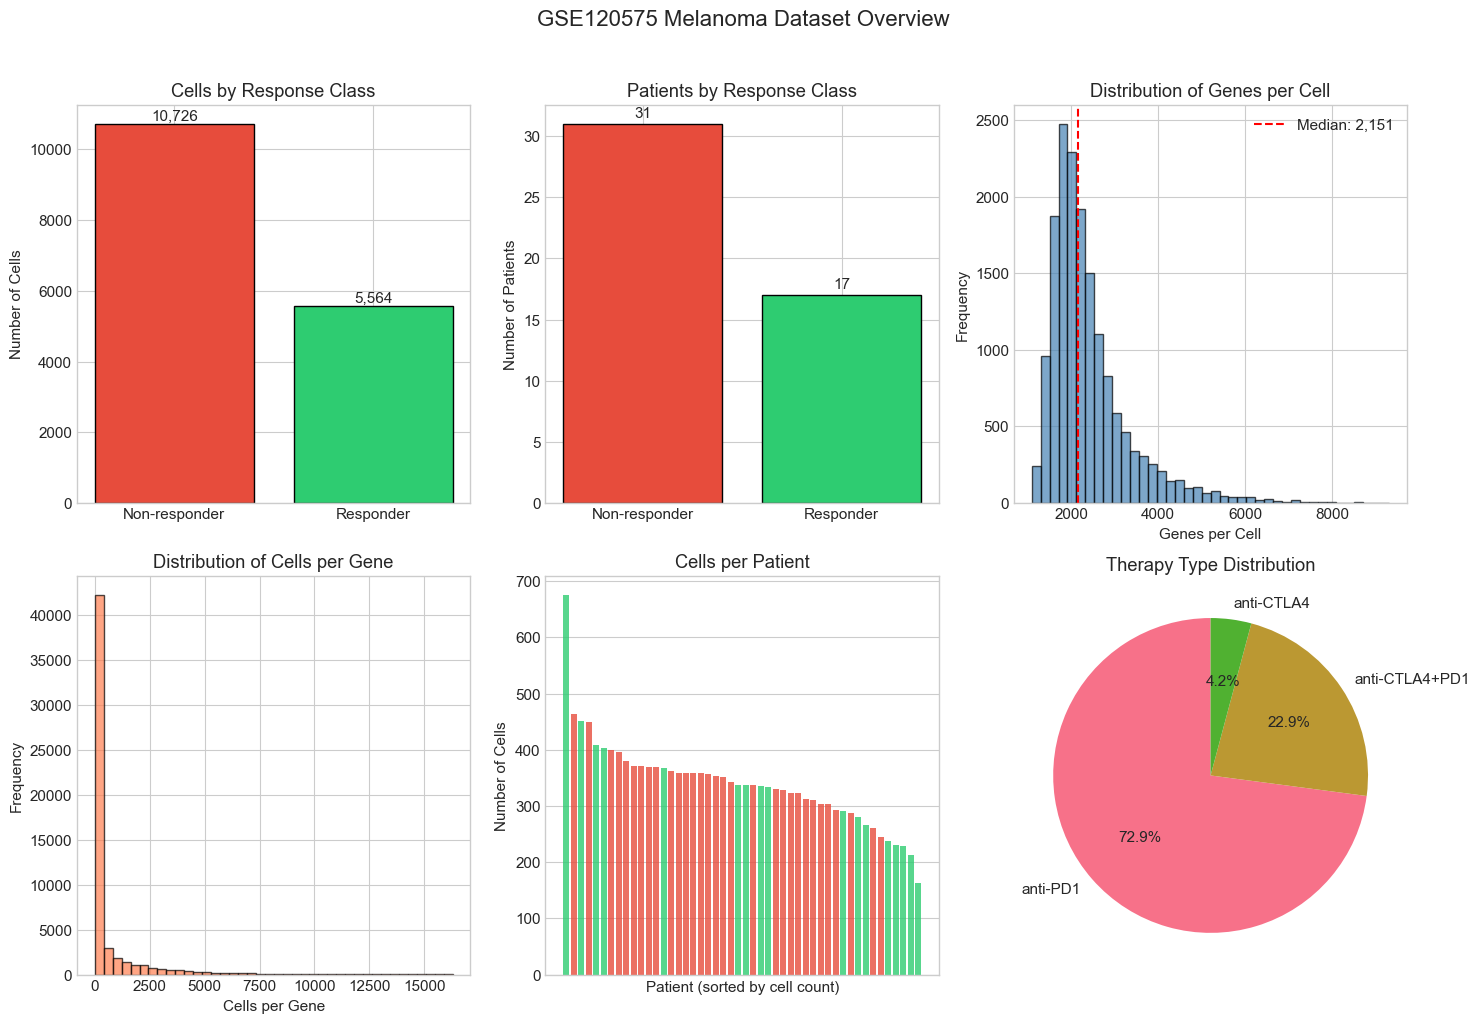

✓ Saved: /Users/tarekalakkadp/Desktop/uvic/fourth-year/fall/csc427/final-project/scRNA-immunotherapy-response-ml/results/figures/dataset_overview.png


In [33]:
# Create a summary figure with all key metrics
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Cells per response class
ax = axes[0, 0]
cell_response = adata.obs['response'].value_counts()
colors = {'Responder': '#2ecc71', 'Non-responder': '#e74c3c'}
ax.bar(cell_response.index, cell_response.values, color=[colors[r] for r in cell_response.index], edgecolor='black')
ax.set_ylabel('Number of Cells')
ax.set_title('Cells by Response Class')
for i, v in enumerate(cell_response.values):
    ax.text(i, v + 100, f'{v:,}', ha='center')

# 2. Patients per response class
ax = axes[0, 1]
patient_response_counts = patient_response.value_counts()
ax.bar(patient_response_counts.index, patient_response_counts.values, 
       color=[colors[r] for r in patient_response_counts.index], edgecolor='black')
ax.set_ylabel('Number of Patients')
ax.set_title('Patients by Response Class')
for i, v in enumerate(patient_response_counts.values):
    ax.text(i, v + 0.5, str(v), ha='center')

# 3. Genes per cell distribution
ax = axes[0, 2]
ax.hist(genes_per_cell, bins=40, color='steelblue', edgecolor='black', alpha=0.7)
ax.axvline(np.median(genes_per_cell), color='red', linestyle='--', label=f'Median: {np.median(genes_per_cell):,.0f}')
ax.set_xlabel('Genes per Cell')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Genes per Cell')
ax.legend()

# 4. Cells per gene distribution
ax = axes[1, 0]
ax.hist(cells_per_gene, bins=40, color='coral', edgecolor='black', alpha=0.7)
ax.set_xlabel('Cells per Gene')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Cells per Gene')

# 5. Cells per patient
ax = axes[1, 1]
patient_cell_counts = adata.obs.groupby('patient_id').size().sort_values(ascending=False)
patient_responses = adata.obs.groupby('patient_id')['response'].first()
bar_colors = ['#2ecc71' if patient_responses[p] == 'Responder' else '#e74c3c' for p in patient_cell_counts.index]
ax.bar(range(len(patient_cell_counts)), patient_cell_counts.values, color=bar_colors, edgecolor='none', alpha=0.8)
ax.set_xlabel('Patient (sorted by cell count)')
ax.set_ylabel('Number of Cells')
ax.set_title('Cells per Patient')
ax.set_xticks([])

# 6. Therapy distribution
ax = axes[1, 2]
therapy_counts = adata.obs.groupby('patient_id')['therapy'].first().value_counts()
ax.pie(therapy_counts, labels=therapy_counts.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Therapy Type Distribution')

plt.suptitle('GSE120575 Melanoma Dataset Overview', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig(FIGURES_DIR / 'dataset_overview.png', bbox_inches='tight', dpi=150)
plt.show()
print(f"✓ Saved: {FIGURES_DIR / 'dataset_overview.png'}")


In [34]:
# List all saved figures
print("Saved Figures")
print("=" * 40)
for fig_file in sorted(FIGURES_DIR.glob('*.png')):
    print(f"  📊 {fig_file.name}")


Saved Figures
  📊 cells_per_gene_distribution.png
  📊 cells_per_patient.png
  📊 dataset_overview.png
  📊 expression_value_distribution.png
  📊 genes_per_cell_distribution.png
  📊 label_distribution_verification.png
  📊 label_therapy_distribution.png
  📊 preprocessing_dimred.png
  📊 preprocessing_qc_before.png
  📊 response_therapy_distribution.png
  📊 signature_genes_expression.png
